## Read and clean a single file
____________
Nombre: Elkin Fernando Ayala 

In [4]:
import os
import sys
import logging
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from pandas_profiling import ProfileReport

#reinicio de Kernel
%load_ext autoreload 
#Reinicio en carpetas para tomar nuevos cambios
%autoreload 2 

project_dir = os.path.dirname(os.path.abspath('.')) # get the path of the project, if doesn't work use os.getcwd() instead and use rfind to find the project dir
sys.path.append(os.path.join(project_dir, 'src', 'data'))

from data_manipulator import get_input_data

bucket = 'esp_bigdata_elkinayala'
directory = 'bigdata'

**Read Metadata**
-------
General info for each relevant column

In [5]:
file = 'gs://{}/{}/data/metadatos-llamadas-urg-y-emer.csv'.format(bucket, directory)
df_metadata = pd.read_csv(file, encoding='latin1', sep=';')
df_metadata

,NOMBRE,DESCRIPCION
0,FECHA_INCIDENTE,Es la fecha el cual se registra la llamada del...
1,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,Es la fecha el cual se inicia el desplazamient...
2,CODIGO LOCALIDAD,Es el código de las 20 localidades de la ciuda...
3,LOCALIDAD,Es la localidad donde sucede el incidente.
4,EDAD,La edad del paciente.
5,UNIDAD,"La descripción de la edad si es en horas, días..."
6,GENERO,Es la distinción de genero del paciente
7,RED,Es la localización a nivel bogota de la red de...
8,TIPO_INCIDENTE,Es la descripción inicial que tipifica el cent...
9,PRIORIDAD,Es la tipificación según la prioridad del inci...


## Read datos-abiertos-julio-2019

In [6]:
raw_data_jul2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-julio-2019.csv'
)
print(raw_data_jul2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   FECHA_INCIDENTE                    14560 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  14560 non-null  object
 2   CODIGO DE LOCALIDAD                14560 non-null  int64 
 3   LOCALIDAD                          14560 non-null  object
 4   EDAD                               14560 non-null  object
 5   UNIDAD                             14560 non-null  object
 6   GENERO                             14560 non-null  object
 7   RED                                14560 non-null  object
 8   TIPO_INCIDENTE                     14560 non-null  object
 9   PRIORIDAD                          14560 non-null  object
 10  MES                                14560 non-null  object
 11  CLASIFICACION FINAL                13035 non-null  object
dtypes: i

In [7]:
raw_data_jul2019.drop('FECHA_INCIDENTE', axis = 1 ).info() #.info() es para saber que podria pasar al hacer lo anterior
raw_data_jul2019 = raw_data_jul2019.drop('FECHA_INCIDENTE', axis = 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  14560 non-null  object
 1   CODIGO DE LOCALIDAD                14560 non-null  int64 
 2   LOCALIDAD                          14560 non-null  object
 3   EDAD                               14560 non-null  object
 4   UNIDAD                             14560 non-null  object
 5   GENERO                             14560 non-null  object
 6   RED                                14560 non-null  object
 7   TIPO_INCIDENTE                     14560 non-null  object
 8   PRIORIDAD                          14560 non-null  object
 9   MES                                14560 non-null  object
 10  CLASIFICACION FINAL                13035 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [8]:
##Add column NUMERO_INCIDENTE
raw_data_jul2019.insert(
    loc = 0,
    column = 'NUMERO_INCIDENTE',
    value = 'SIN_DATO')
raw_data_jul2019.head()

,NUMERO_INCIDENTE,FECHA_INICIO_DESPLAZAMIENTO-MOVIL,CODIGO DE LOCALIDAD,LOCALIDAD,EDAD,UNIDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,MES,CLASIFICACION FINAL
0,SIN_DATO,2019-07-01 00:11:02,8,Kennedy,39,Años,FEMENINO,Norte,Dificultad Respiratoria,ALTA,JULIO,Traslado
1,SIN_DATO,2019-07-01 00:12:56,19,Ciudad Bolivar,69,Años,MASCULINO,Sur,Inconsciente/Paro Cardiorrespiratorio,ALTA,JULIO,NaN
2,SIN_DATO,2019-07-01 00:10:26,6,Tunjuelito,25,Años,MASCULINO,Sur,Enfermo,MEDIA,JULIO,Traslado
3,SIN_DATO,2019-07-01 00:15:47,8,Kennedy,65,Años,MASCULINO,Sur,Lesiones personales,MEDIA,JULIO,Traslado
4,SIN_DATO,2019-07-01 00:31:13,10,Engativa,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Enfermo,MEDIA,JULIO,Cancelado


**Rename Columns datos-abiertos-julio-2019**

In [9]:
# Don't let white spaces between headers to avoid errors during the pipeline
# This is sometimes called a recipe for etl
raw_data_jul2019.rename(
    columns = {
        'FECHA_INICIO_DESPLAZAMIENTO-MOVIL' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD'               : 'CODIGO_LOCALIDAD',
        'CLASIFICACION FINAL'               : 'CLASIFICACION_FINAL'
    },
    inplace=True
)
raw_data_jul2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   14560 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  14560 non-null  object
 2   CODIGO_LOCALIDAD                   14560 non-null  int64 
 3   LOCALIDAD                          14560 non-null  object
 4   EDAD                               14560 non-null  object
 5   UNIDAD                             14560 non-null  object
 6   GENERO                             14560 non-null  object
 7   RED                                14560 non-null  object
 8   TIPO_INCIDENTE                     14560 non-null  object
 9   PRIORIDAD                          14560 non-null  object
 10  MES                                14560 non-null  object
 11  CLASIFICACION_FINAL                13035 non-null  object
dtypes: i

**Check values per field datos-abiertos-julio-2019 (LOCALIDAD, GENERO, TIPO_INCIDENTE, CLASIFICACION_FINAL)**

In [10]:
raw_data_jul2019['LOCALIDAD'].value_counts(dropna=False)

 Kennedy               1593
 Suba                  1548
Engativa               1521
 Bosa                  1122
 Ciudad Bolivar         994
Usaquen                 786
San Cristobal           776
 Rafael Uribe Uribe     741
Fontibon                723
 Puente Aranda          690
Usme                    636
Chapinero               599
Barrios Unidos          516
Los Martires            516
Santa Fe                489
Teusaquillo             464
Tunjuelito              462
 Antonio Nariño         292
 La Candelaria           91
 Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [11]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_jul2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               1593
Suba                  1548
Engativa              1521
Bosa                  1122
Ciudad Bolivar         994
Usaquen                786
San Cristobal          776
Rafael Uribe Uribe     741
Fontibon               723
Puente Aranda          690
Usme                   636
Chapinero              599
Barrios Unidos         516
Los Martires           516
Santa Fe               489
Teusaquillo            464
Tunjuelito             462
Antonio Nariño         292
La Candelaria           91
Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [12]:
raw_data_jul2019['LOCALIDAD'] = raw_data_jul2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [13]:
raw_data_jul2019.head()

,NUMERO_INCIDENTE,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,UNIDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,MES,CLASIFICACION_FINAL
0,SIN_DATO,2019-07-01 00:11:02,8,Kennedy,39,Años,FEMENINO,Norte,Dificultad Respiratoria,ALTA,JULIO,Traslado
1,SIN_DATO,2019-07-01 00:12:56,19,Ciudad Bolivar,69,Años,MASCULINO,Sur,Inconsciente/Paro Cardiorrespiratorio,ALTA,JULIO,NaN
2,SIN_DATO,2019-07-01 00:10:26,6,Tunjuelito,25,Años,MASCULINO,Sur,Enfermo,MEDIA,JULIO,Traslado
3,SIN_DATO,2019-07-01 00:15:47,8,Kennedy,65,Años,MASCULINO,Sur,Lesiones personales,MEDIA,JULIO,Traslado
4,SIN_DATO,2019-07-01 00:31:13,10,Engativa,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Enfermo,MEDIA,JULIO,Cancelado


In [14]:
col = 'GENERO'
raw_data_jul2019[col] = raw_data_jul2019[col].apply(lambda x: x.strip())
raw_data_jul2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

SIN_DATO     6621
MASCULINO    4190
FEMENINO     3749
Name: GENERO, dtype: int64

In [15]:
#col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
#raw_data_jul2019[col] = pd.to_datetime(raw_data_jul2019[col]).value_counts()

In [16]:
raw_data_jul2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   14560 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  14560 non-null  object
 2   CODIGO_LOCALIDAD                   14560 non-null  int64 
 3   LOCALIDAD                          14560 non-null  object
 4   EDAD                               14560 non-null  object
 5   UNIDAD                             14560 non-null  object
 6   GENERO                             14560 non-null  object
 7   RED                                14560 non-null  object
 8   TIPO_INCIDENTE                     14560 non-null  object
 9   PRIORIDAD                          14560 non-null  object
 10  MES                                14560 non-null  object
 11  CLASIFICACION_FINAL                13035 non-null  object
dtypes: i

In [17]:
col = 'TIPO_INCIDENTE'
raw_data_jul2019[col] = raw_data_jul2019[col].apply(lambda x: x.strip())
raw_data_jul2019[col].value_counts(dropna=False)

Accidente de tránsito con heridos/Muertos    4261
Inconsciente/Paro Cardiorrespiratorio        1623
Dificultad Respiratoria                      1398
Enfermo                                      1131
Convulsiones                                 1011
Heridos                                       747
Trastorno mental                              709
Dolor torácico                                611
Lesiones personales                           547
Intento de suicidio                           534
Patología Gineco - obstétrica                 425
Síntomas gastrointestinales                   344
Accidente cerebro vascular                    323
Caída                                         318
Intoxicaciones                                141
Ideas de suicidio                             111
Violencia Sexual                               41
Muerte Natural                                 39
SIN_DATO                                       39
Incendio estructural                           29


In [18]:
col = 'TIPO_INCIDENTE'
raw_data_jul2019[col] = raw_data_jul2019[col].apply(lambda x: x.upper())
raw_data_jul2019[col].value_counts(dropna=False)

ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS    4261
INCONSCIENTE/PARO CARDIORRESPIRATORIO        1623
DIFICULTAD RESPIRATORIA                      1398
ENFERMO                                      1131
CONVULSIONES                                 1011
HERIDOS                                       747
TRASTORNO MENTAL                              709
DOLOR TORÁCICO                                611
LESIONES PERSONALES                           547
INTENTO DE SUICIDIO                           534
PATOLOGÍA GINECO - OBSTÉTRICA                 425
SÍNTOMAS GASTROINTESTINALES                   344
ACCIDENTE CEREBRO VASCULAR                    323
CAÍDA                                         318
INTOXICACIONES                                141
IDEAS DE SUICIDIO                             111
VIOLENCIA SEXUAL                               41
MUERTE NATURAL                                 39
SIN_DATO                                       39
INCENDIO ESTRUCTURAL                           29


In [19]:
col = 'CLASIFICACION_FINAL'
#raw_data_jul2019[col] = raw_data[col].apply(lambda x: x.strip())
raw_data_jul2019[col].value_counts(dropna=False)
raw_data_jul2019[col].fillna('SIN_DATO').value_counts()

Traslado                       6162
Cancelado                      3637
SIN_DATO                       1525
Trasladado por Otro Recurso    1501
Falsa Alarma                   1291
No Ubica                        215
Desistimiento                   137
No Amerita Traslado              64
Fallecido                        28
Name: CLASIFICACION_FINAL, dtype: int64

In [20]:
col = 'EDAD'
raw_data_jul2019[col].value_counts(dropna=False)
raw_data_jul2019[col] = raw_data_jul2019[col].replace('SIN_DATO', -1)#.value_counts()

In [21]:
col = 'CLASIFICACION_FINAL'
raw_data_jul2019[col].fillna('SIN_DATO', inplace=True)
raw_data_jul2019[col] = raw_data_jul2019[col].apply(lambda x: x.strip())
raw_data_jul2019.head()

,NUMERO_INCIDENTE,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,UNIDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,MES,CLASIFICACION_FINAL
0,SIN_DATO,2019-07-01 00:11:02,8,Kennedy,39,Años,FEMENINO,Norte,DIFICULTAD RESPIRATORIA,ALTA,JULIO,Traslado
1,SIN_DATO,2019-07-01 00:12:56,19,Ciudad Bolivar,69,Años,MASCULINO,Sur,INCONSCIENTE/PARO CARDIORRESPIRATORIO,ALTA,JULIO,SIN_DATO
2,SIN_DATO,2019-07-01 00:10:26,6,Tunjuelito,25,Años,MASCULINO,Sur,ENFERMO,MEDIA,JULIO,Traslado
3,SIN_DATO,2019-07-01 00:15:47,8,Kennedy,65,Años,MASCULINO,Sur,LESIONES PERSONALES,MEDIA,JULIO,Traslado
4,SIN_DATO,2019-07-01 00:31:13,10,Engativa,-1,SIN_DATO,SIN_DATO,Norte,ENFERMO,MEDIA,JULIO,Cancelado


In [22]:
print('Number of rows before cleaning:', raw_data_jul2019.shape[0] )
raw_data_jul2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_jul2019.shape[0] )

Number of rows before cleaning: 14560
Number of rows after cleaning: 13841


In [23]:
raw_data_jul2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13841 entries, 0 to 14559
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   13841 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  13841 non-null  object
 2   CODIGO_LOCALIDAD                   13841 non-null  int64 
 3   LOCALIDAD                          13841 non-null  object
 4   EDAD                               13841 non-null  object
 5   UNIDAD                             13841 non-null  object
 6   GENERO                             13841 non-null  object
 7   RED                                13841 non-null  object
 8   TIPO_INCIDENTE                     13841 non-null  object
 9   PRIORIDAD                          13841 non-null  object
 10  MES                                13841 non-null  object
 11  CLASIFICACION_FINAL                13841 non-null  object
dtypes: i

**Saving datos-abiertos-julio-2019**

In [24]:
# saving in a local directory
raw_data_jul2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_julio_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-agosto-2019

In [317]:
raw_data_ago2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-agosto-2019.csv'
)
print(raw_data_ago2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18141 entries, 0 to 18140
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   18141 non-null  int64 
 1   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  18141 non-null  object
 2   CODIGO DE LOCALIDAD                18141 non-null  int64 
 3   LOCALIDAD                          18141 non-null  object
 4   EDAD                               18141 non-null  object
 5   UNIDAD                             18141 non-null  object
 6   GENERO                             18141 non-null  object
 7   RED                                18141 non-null  object
 8   TIPO DE INCIDIDENT                 18141 non-null  object
 9   PRIORIDAD                          18141 non-null  object
 10  MES                                18141 non-null  object
 11  CLASIFICACION FINAL                18138 non-null  object
dtypes: i

**Rename Columns datos-abiertos-agosto-2019**

In [318]:
# Don't let white spaces between headers to avoid errors during the pipeline
# This is sometimes called a recipe for etl
raw_data_ago2019.rename(
    columns = {
        'FECHA_INICIO_DESPLAZAMIENTO-MOVIL' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD'               : 'CODIGO_LOCALIDAD',
        'CLASIFICACION FINAL'               : 'CLASIFICACION_FINAL',
        'TIPO DE INCIDIDENT'                : 'TIPO_INCIDENTE'
    },
    inplace=True
)
raw_data_ago2019.head()

,NUMERO_INCIDENTE,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,UNIDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,MES,CLASIFICACION_FINAL
0,809224194,1/08/2019 0:28,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Inconsciente/Paro Cardiorrespiratorio,ALTA,AGOSTO,Cancelado
1,809224194,1/08/2019 0:28,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Inconsciente/Paro Cardiorrespiratorio,ALTA,AGOSTO,Cancelado
2,809240194,1/08/2019 0:15,11,Suba,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Accidente cerebro vascular,BAJA,AGOSTO,Cancelado
3,809240194,1/08/2019 0:15,11,Suba,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Accidente cerebro vascular,BAJA,AGOSTO,Cancelado
4,809240194,1/08/2019 0:15,11,Suba,SIN_DATO,SIN_DATO,SIN_DATO,Norte,Accidente cerebro vascular,BAJA,AGOSTO,Cancelado


**Check values per field datos-abiertos-julio-2019 (LOCALIDAD, GENERO, TIPO_INCIDENTE, CLASIFICACION_FINAL)**

In [319]:
raw_data_ago2019['LOCALIDAD'].value_counts(dropna=False)

Kennedy                2717
 Engativa              1805
 Suba                  1678
 Bosa                  1264
Ciudad Bolivar         1220
Puente Aranda           977
 San Cristobal          906
Usaquen                 894
 Rafael Uribe Uribe     892
Fontibon                878
Chapinero               707
Santa Fe                682
 Usme                   637
 Barrios Unidos         608
 Teusaquillo            599
Tunjuelito              595
Los Martires            593
 Antonio Nariño         369
 La Candelaria          119
 Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [320]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_ago2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2717
Engativa              1805
Suba                  1678
Bosa                  1264
Ciudad Bolivar        1220
Puente Aranda          977
San Cristobal          906
Usaquen                894
Rafael Uribe Uribe     892
Fontibon               878
Chapinero              707
Santa Fe               682
Usme                   637
Barrios Unidos         608
Teusaquillo            599
Tunjuelito             595
Los Martires           593
Antonio Nariño         369
La Candelaria          119
Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [321]:
raw_data_ago2019['LOCALIDAD'] = raw_data_ago2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [322]:
col = 'GENERO'
raw_data_ago2019[col] = raw_data_ago2019[col].apply(lambda x: x.strip())
raw_data_ago2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

SIN_DATO     8617
MASCULINO    5143
FEMENINO     4381
Name: GENERO, dtype: int64

In [324]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
raw_data_ago2019[col] = pd.to_datetime(raw_data_ago2019[col])#.value_counts()

In [325]:
col = 'TIPO_INCIDENTE'
raw_data_ago2019[col] = raw_data_ago2019[col].apply(lambda x: x.strip())
raw_data_ago2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

Accidente de tránsito con heridos/Muertos    6827
Inconsciente/Paro Cardiorrespiratorio        1875
Dificultad Respiratoria                      1504
Enfermo                                      1233
Convulsiones                                 1135
Heridos                                       847
Lesiones personales                           718
Trastorno mental                              670
Dolor torácico                                628
Intento de suicidio                           555
Síntomas gastrointestinales                   418
Accidente cerebro vascular                    401
Patología Gineco - obstétrica                 353
Caída                                         295
Intoxicaciones                                181
Ideas de suicidio                             102
SIN_DATO                                       58
Incendio estructural                           51
Muerte Natural                                 35
Violencia Sexual                               33


In [447]:
col = 'EDAD'
raw_data_ago2019[col].value_counts(dropna=False)
raw_data_ago2019[col] = raw_data_ago2019[col].replace('SIN_DATO', -1)#.value_counts()

In [326]:
col = 'TIPO_INCIDENTE'
raw_data_ago2019[col] = raw_data_ago2019[col].apply(lambda x: x.upper())
raw_data_ago2019[col].value_counts(dropna=False)

ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS    6827
INCONSCIENTE/PARO CARDIORRESPIRATORIO        1875
DIFICULTAD RESPIRATORIA                      1504
ENFERMO                                      1233
CONVULSIONES                                 1135
HERIDOS                                       847
LESIONES PERSONALES                           718
TRASTORNO MENTAL                              670
DOLOR TORÁCICO                                628
INTENTO DE SUICIDIO                           555
SÍNTOMAS GASTROINTESTINALES                   418
ACCIDENTE CEREBRO VASCULAR                    401
PATOLOGÍA GINECO - OBSTÉTRICA                 353
CAÍDA                                         295
INTOXICACIONES                                181
IDEAS DE SUICIDIO                             102
SIN_DATO                                       58
INCENDIO ESTRUCTURAL                           51
MUERTE NATURAL                                 35
VIOLENCIA SEXUAL                               33


In [327]:
col = 'CLASIFICACION_FINAL'
raw_data_ago2019[col].fillna('SIN_DATO').value_counts()
#raw_data_ago2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

Traslado                       7311
Cancelado                      4935
Trasladado por Otro Recurso    1813
Falsa Alarma                   1738
Desistimiento                  1449
No Amerita Traslado             452
No Ubica                        235
Fallecido                       205
SIN_DATO                          3
Name: CLASIFICACION_FINAL, dtype: int64

In [328]:
print('Number of rows before cleaning:', raw_data_ago2019.shape[0] )
raw_data_ago2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_ago2019.shape[0] )

Number of rows before cleaning: 18141
Number of rows after cleaning: 16807


**Saving datos-abiertos-agosto-2019**

In [329]:
# saving in a local directory
raw_data_ago2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_ago_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-septiembre-2019

In [32]:
raw_data_sep2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-septiembre-2019.csv'
)
print(raw_data_sep2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17018 entries, 0 to 17017
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   17018 non-null  int64 
 1   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  17018 non-null  object
 2   CODIGO DE LOCALIDAD                17018 non-null  int64 
 3   LOCALIDAD                          17018 non-null  object
 4   EDAD                               17018 non-null  int64 
 5   UNIDAD                             9371 non-null   object
 6   GENERO                             17018 non-null  object
 7   RED                                17018 non-null  object
 8   TIPO_INCIDENTE                     17018 non-null  object
 9   PRIORIDAD                          17018 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.3+ MB
None


In [33]:
##Add column MES, CLASIFICACION_FINAL
raw_data_sep2019.insert(
    loc = 10, 
    column = 'MES',
    value = 'SEPTIEMBRE')
raw_data_sep2019.insert(
    loc = 11, 
    column = 'CLASIFICACION_FINAL',
    value = 'SIN_DATO')
raw_data_sep2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17018 entries, 0 to 17017
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   17018 non-null  int64 
 1   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  17018 non-null  object
 2   CODIGO DE LOCALIDAD                17018 non-null  int64 
 3   LOCALIDAD                          17018 non-null  object
 4   EDAD                               17018 non-null  int64 
 5   UNIDAD                             9371 non-null   object
 6   GENERO                             17018 non-null  object
 7   RED                                17018 non-null  object
 8   TIPO_INCIDENTE                     17018 non-null  object
 9   PRIORIDAD                          17018 non-null  object
 10  MES                                17018 non-null  object
 11  CLASIFICACION_FINAL                17018 non-null  object
dtypes: i

In [34]:
# Don't let white spaces between headers to avoid errors during the pipeline
# This is sometimes called a recipe for etl
raw_data_sep2019.rename(
    columns = {
        'FECHA_INICIO_DESPLAZAMIENTO-MOVIL' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD'               : 'CODIGO_LOCALIDAD',
        'TIPO DE INCIDIDENT'                : 'TIPO_INCIDENTE'
    },
    inplace=True
)
raw_data_sep2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17018 entries, 0 to 17017
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   17018 non-null  int64 
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  17018 non-null  object
 2   CODIGO_LOCALIDAD                   17018 non-null  int64 
 3   LOCALIDAD                          17018 non-null  object
 4   EDAD                               17018 non-null  int64 
 5   UNIDAD                             9371 non-null   object
 6   GENERO                             17018 non-null  object
 7   RED                                17018 non-null  object
 8   TIPO_INCIDENTE                     17018 non-null  object
 9   PRIORIDAD                          17018 non-null  object
 10  MES                                17018 non-null  object
 11  CLASIFICACION_FINAL                17018 non-null  object
dtypes: i

In [35]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_sep2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2398
Suba                  1634
Engativa              1631
Bosa                  1294
Ciudad Bolivar        1138
Puente Aranda          938
Rafael Uribe Uribe     854
Usaquen                829
San Cristobal          826
Fontibon               809
Chapinero              749
Barrios Unidos         616
Tunjuelito             603
Los Martires           593
Usme                   572
Santa Fe               549
Teusaquillo            540
Antonio Nariño         362
La Candelaria           83
Name: LOCALIDAD, dtype: int64

In [36]:
raw_data_sep2019['LOCALIDAD'] = raw_data_sep2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [37]:
col = 'GENERO'
raw_data_sep2019[col] = raw_data_sep2019[col].apply(lambda x: x.strip())
raw_data_sep2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

SIN_DATO     7632
MASCULINO    5082
FEMENINO     4304
Name: GENERO, dtype: int64

In [38]:
col = 'EDAD'
raw_data_sep2019[col].value_counts(dropna=False)
raw_data_sep2019[col] = raw_data_sep2019[col].replace('SIN_DATO', -1)#.value_counts()

In [39]:
col = 'UNIDAD'
#raw_data_sep2019[col] = raw_data_sep2019[col].apply(lambda x: x.strip())
raw_data_sep2019[col].fillna('SIN_DATO').value_counts()

Años        9311
SIN_DATO    7647
Meses         42
Dias          10
Horas          8
Name: UNIDAD, dtype: int64

In [40]:
#col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
#raw_data_sep2019[col] = pd.to_datetime(raw_data_sep2019[col]).value_counts()

In [41]:
col = 'UNIDAD'
#raw_data_sep2019[col] = raw_data_sep2019[col].apply(lambda x: x.strip())
raw_data_sep2019[col].fillna('SIN_DATO').value_counts()

Años        9311
SIN_DATO    7647
Meses         42
Dias          10
Horas          8
Name: UNIDAD, dtype: int64

In [351]:
col = 'TIPO_INCIDENTE'
raw_data_sep2019[col].value_counts(dropna=False)   # here we could apply the same technique as before to avoid errors

ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS    6333
INCONSCIENTE/PARO CARDIORRESPIRATORIO        1720
DIFICULTAD RESPIRATORIA                      1386
ENFERMO                                      1137
CONVULSIONES                                 1039
HERIDOS                                       834
INTENTO DE SUICIDIO                           653
DOLOR TORÁCICO                                629
TRASTORNO MENTAL                              621
LESIONES PERSONALES                           593
PATOLOGÍA GINECO - OBSTÉTRICA                 421
SÍNTOMAS GASTROINTESTINALES                   360
ACCIDENTE CEREBRO VASCULAR                    352
CAÍDA                                         334
INTOXICACIONES                                156
IDEAS DE SUICIDIO                             113
VIOLENCIA SEXUAL                               48
INCENDIO ESTRUCTURAL                           40
SIN_DATO                                       32
SANGRADO VAGINAL                               25


In [31]:
col = 'PRIORIDAD'
#raw_data_sep2019[col] = raw_data_sep2019[col].apply(lambda x: x.replace('SIN_D','SIN_DATO'))
#raw_data_sep2019[col] = raw_data_sep2019[col].apply(lambda x: x.replace('DUMMY','SIN_DATO'))  
#raw_data_sep2019[col] = raw_data_sep2019[col].replace('SIN_D', 'SIN_DATO', inplace=False)
raw_data_sep2019[col].value_counts(dropna=False)

NaN    17018
Name: PRIORIDAD, dtype: int64

In [353]:
col = 'CLASIFICACION_FINAL'
raw_data_sep2019[col].value_counts(dropna=False)

SIN_DATO    17018
Name: CLASIFICACION_FINAL, dtype: int64

In [354]:
print('Number of rows before cleaning:', raw_data_sep2019.shape[0] )
raw_data_sep2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_sep2019.shape[0] )

Number of rows before cleaning: 17018
Number of rows after cleaning: 16267


**Saving datos-abiertos-septiembre-2019**

In [356]:
# saving in a local directory
raw_data_sep2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_sep_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-octubre-2019

In [357]:
raw_data_oct2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-octubre-2019.csv'
)
print(raw_data_oct2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18195 entries, 0 to 18194
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO_INCIDENTE     18195 non-null  int64 
 1   FECHA_DESPACHO_518   18195 non-null  object
 2   CODIGO DE LOCALIDAD  18195 non-null  int64 
 3   LOCALIDAD            18195 non-null  object
 4   EDAD                 18195 non-null  object
 5   UNIDAD               9503 non-null   object
 6   GENERO               9543 non-null   object
 7   RED                  18195 non-null  object
 8   TIPO_INCIDENTE       18195 non-null  object
 9   PRIORIDAD            18195 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB
None


In [358]:
##Add column MES, CLASIFICACION_FINAL
raw_data_oct2019.insert(
    loc = 10, 
    column = 'MES',
    value = 'OCTUBRE')
raw_data_oct2019.insert(
    loc = 11, 
    column = 'CLASIFICACION_FINAL',
    value = 'SIN_DATO')
# Don't let white spaces between headers to avoid errors during the pipeline
# This is sometimes called a recipe for etl
raw_data_oct2019.rename(
    columns = {
        'FECHA_DESPACHO_518'                : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD'               : 'CODIGO_LOCALIDAD'
    },
    inplace=True
)
raw_data_oct2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18195 entries, 0 to 18194
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   18195 non-null  int64 
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  18195 non-null  object
 2   CODIGO_LOCALIDAD                   18195 non-null  int64 
 3   LOCALIDAD                          18195 non-null  object
 4   EDAD                               18195 non-null  object
 5   UNIDAD                             9503 non-null   object
 6   GENERO                             9543 non-null   object
 7   RED                                18195 non-null  object
 8   TIPO_INCIDENTE                     18195 non-null  object
 9   PRIORIDAD                          18195 non-null  object
 10  MES                                18195 non-null  object
 11  CLASIFICACION_FINAL                18195 non-null  object
dtypes: i

In [359]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_oct2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2546
Engativa              1791
Suba                  1742
Bosa                  1334
Ciudad Bolivar        1141
Puente Aranda          989
Rafael Uribe Uribe     949
Usaquen                888
Fontibon               863
San Cristobal          844
Chapinero              763
Los Martires           697
Santa Fe               689
Barrios Unidos         680
Usme                   609
Tunjuelito             589
Teusaquillo            536
Antonio Nariño         419
La Candelaria          120
Sumapaz                  6
Name: LOCALIDAD, dtype: int64

In [360]:
raw_data_oct2019['LOCALIDAD'] = raw_data_oct2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [361]:
col = 'GENERO'
#raw_data_oct2019[col] = raw_data_oct2019[col].apply(lambda x: x.strip())
raw_data_oct2019[col] = raw_data_oct2019[col].fillna('SIN_DATO')#.value_counts()  # here we could apply the same technique as before to avoid errors

In [449]:
col = 'EDAD'
raw_data_oct2019[col].value_counts(dropna=False)
raw_data_oct2019[col] = raw_data_oct2019[col].replace('SIN_DATO', -1)#.value_counts()

In [362]:
col = 'UNIDAD'
raw_data_oct2019[col] = raw_data_oct2019[col].fillna('SIN_DATO')#.value_counts()
#raw_data_oct2019[col].value_counts(dropna=False)

In [367]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
raw_data_oct2019[col] = pd.to_datetime(raw_data_oct2019[col])
raw_data_oct2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18195 entries, 0 to 18194
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   NUMERO_INCIDENTE                   18195 non-null  int64         
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  18195 non-null  datetime64[ns]
 2   CODIGO_LOCALIDAD                   18195 non-null  int64         
 3   LOCALIDAD                          18195 non-null  object        
 4   EDAD                               18195 non-null  object        
 5   UNIDAD                             18195 non-null  object        
 6   GENERO                             18195 non-null  object        
 7   RED                                18195 non-null  object        
 8   TIPO_INCIDENTE                     18195 non-null  object        
 9   PRIORIDAD                          18195 non-null  object        
 10  MES                               

In [368]:
col = 'TIPO_INCIDENTE'
raw_data_oct2019[col] = raw_data_oct2019[col].apply(lambda x: x.upper())
raw_data_oct2019[col].value_counts(dropna=False)

ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS    6778
INCONSCIENTE/PARO CARDIORRESPIRATORIO        1768
DIFICULTAD RESPIRATORIA                      1497
ENFERMO                                      1276
CONVULSIONES                                 1130
HERIDOS                                       828
DOLOR TORÁCICO                                735
INTENTO DE SUICIDIO                           668
LESIONES PERSONALES                           657
TRASTORNO MENTAL                              654
ACCIDENTE CEREBRO VASCULAR                    396
PATOLOGÍA GINECO - OBSTÉTRICA                 378
SÍNTOMAS GASTROINTESTINALES                   375
CAÍDA                                         322
INTOXICACIONES                                179
IDEAS DE SUICIDIO                             111
SIN_DATO                                       60
INCENDIO ESTRUCTURAL                           51
MUERTE NATURAL                                 39
VIOLENCIA SEXUAL                               32


In [369]:
print('Number of rows before cleaning:', raw_data_oct2019.shape[0] )
raw_data_oct2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_oct2019.shape[0] )

Number of rows before cleaning: 18195
Number of rows after cleaning: 16559


In [371]:
# saving in a local directory
raw_data_oct2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_oct_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-noviembre-2019

In [401]:
raw_data_nov2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-noviembre_2019.csv'
)
print(raw_data_nov2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   15926 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO-MOVIL  15926 non-null  object
 2   CODIGO DE LOCALIDAD                15926 non-null  int64 
 3   LOCALIDAD                          15926 non-null  object
 4   EDAD                               15926 non-null  int64 
 5   UNIDAD                             15926 non-null  object
 6   GENERO                             15926 non-null  object
 7   RED                                15926 non-null  object
 8   TIPO_INCIDENTE                     15926 non-null  object
 9   PRIORIDAD                          15926 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB
None


In [402]:
##Add column MES, CLASIFICACION_FINAL
raw_data_nov2019.insert(
    loc = 10, 
    column = 'MES',
    value = 'NOVIEMBRE')
raw_data_nov2019.insert(
    loc = 11, 
    column = 'CLASIFICACION_FINAL',
    value = 'SIN_DATO')
raw_data_nov2019.rename(
    columns = {
        'FECHA_INICIO_DESPLAZAMIENTO-MOVIL' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD'               : 'CODIGO_LOCALIDAD'
    },
    inplace=True)
raw_data_nov2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   15926 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  15926 non-null  object
 2   CODIGO_LOCALIDAD                   15926 non-null  int64 
 3   LOCALIDAD                          15926 non-null  object
 4   EDAD                               15926 non-null  int64 
 5   UNIDAD                             15926 non-null  object
 6   GENERO                             15926 non-null  object
 7   RED                                15926 non-null  object
 8   TIPO_INCIDENTE                     15926 non-null  object
 9   PRIORIDAD                          15926 non-null  object
 10  MES                                15926 non-null  object
 11  CLASIFICACION_FINAL                15926 non-null  object
dtypes: i

In [403]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_nov2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2192
Engativa              1571
Suba                  1424
Bosa                  1189
Ciudad Bolivar        1123
Puente Aranda          854
Rafael Uribe Uribe     835
Usaquen                808
Fontibon               787
San Cristobal          758
Santa Fe               613
Chapinero              577
Usme                   577
Los Martires           560
Tunjuelito             551
Teusaquillo            546
Barrios Unidos         520
Antonio Nariño         338
La Candelaria          102
Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [404]:
raw_data_nov2019['LOCALIDAD'] = raw_data_nov2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [405]:
col = 'TIPO_INCIDENTE'
raw_data_nov2019[col] = raw_data_nov2019[col].apply(lambda x: x.upper()).value_counts()

In [450]:
col = 'EDAD'
raw_data_nov2019[col].value_counts(dropna=False)
raw_data_nov2019[col] = raw_data_nov2019[col].replace('SIN_DATO', -1)#.value_counts()

In [406]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
raw_data_nov2019[col] = pd.to_datetime(raw_data_nov2019[col])

In [407]:
print('Number of rows before cleaning:', raw_data_nov2019.shape[0] )
raw_data_nov2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_nov2019.shape[0] )

Number of rows before cleaning: 15926
Number of rows after cleaning: 15886


**save cleanned data**

In [408]:
# saving in a local directory
raw_data_nov2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_nov_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-diciembre-2019

In [409]:
raw_data_dic2019 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos_abiertos_cons_diciembre_2019.csv'
)
print(raw_data_dic2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO_INCIDENTE     16243 non-null  object
 1   FECHA_DESPACHO_518   16243 non-null  object
 2   CODIGO DE LOCALIDAD  16243 non-null  int64 
 3   LOCALIDAD            16243 non-null  object
 4   EDAD                 16243 non-null  int64 
 5   UNIDAD               16243 non-null  object
 6   GENERO               16243 non-null  object
 7   RED                  16243 non-null  object
 8   TIPO_INCIDENTE       16243 non-null  object
 9   PRIORIDAD            16243 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB
None


In [410]:
##Add column MES, CLASIFICACION_FINAL
raw_data_dic2019.insert(
    loc = 10, 
    column = 'MES',
    value = 'DICIEMBRE')
raw_data_dic2019.insert(
    loc = 11, 
    column = 'CLASIFICACION_FINAL',
    value = 'SIN_DATO')
raw_data_dic2019.rename(
    columns = {
        'FECHA_DESPACHO_518' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD' : 'CODIGO_LOCALIDAD'
    },
    inplace=True
)
raw_data_dic2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   16243 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  16243 non-null  object
 2   CODIGO_LOCALIDAD                   16243 non-null  int64 
 3   LOCALIDAD                          16243 non-null  object
 4   EDAD                               16243 non-null  int64 
 5   UNIDAD                             16243 non-null  object
 6   GENERO                             16243 non-null  object
 7   RED                                16243 non-null  object
 8   TIPO_INCIDENTE                     16243 non-null  object
 9   PRIORIDAD                          16243 non-null  object
 10  MES                                16243 non-null  object
 11  CLASIFICACION_FINAL                16243 non-null  object
dtypes: i

In [411]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_dic2019['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2317
Engativá              1644
Suba                  1471
Bosa                  1182
Ciudad Bolívar        1121
Puente Aranda          904
Fontibón               864
San Cristóbal          838
Rafael Uribe Uribe     772
Usaquén                770
Usme                   630
Tunjuelito             616
Santa Fe               589
Chapinero              556
Los Mártires           525
Barrios Unidos         513
Teusaquillo            497
Antonio Nariño         373
La Candelaria           60
Sumapaz                  1
Name: LOCALIDAD, dtype: int64

In [412]:
raw_data_dic2019['LOCALIDAD'] = raw_data_dic2019['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [413]:
col = 'UNIDAD'
raw_data_dic2019[col] = raw_data_dic2019[col].apply(lambda x: x.replace('/','_')) 
raw_data_dic2019[col].value_counts()

SIN_DATO    8286
Años        7889
Meses         45
Horas         13
Dias          10
Name: UNIDAD, dtype: int64

In [451]:
col = 'EDAD'
raw_data_dic2019[col].value_counts(dropna=False)
raw_data_dic2019[col] = raw_data_dic2019[col].replace('SIN_DATO', -1)#.value_counts()

In [414]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
raw_data_dic2019[col] = pd.to_datetime(raw_data_dic2019[col])
raw_data_dic2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   NUMERO_INCIDENTE                   16243 non-null  object        
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  16243 non-null  datetime64[ns]
 2   CODIGO_LOCALIDAD                   16243 non-null  int64         
 3   LOCALIDAD                          16243 non-null  object        
 4   EDAD                               16243 non-null  int64         
 5   UNIDAD                             16243 non-null  object        
 6   GENERO                             16243 non-null  object        
 7   RED                                16243 non-null  object        
 8   TIPO_INCIDENTE                     16243 non-null  object        
 9   PRIORIDAD                          16243 non-null  object        
 10  MES                               

In [415]:
col = 'GENERO'
raw_data_dic2019[col] = raw_data_dic2019[col].apply(lambda x: x.replace('/','_')) 
raw_data_dic2019[col].value_counts()

SIN_DATO     8286
MASCULINO    4405
FEMENINO     3552
Name: GENERO, dtype: int64

In [416]:
col = 'TIPO_INCIDENTE'
raw_data_dic2019[col] = raw_data_dic2019[col].apply(lambda x: x.upper())
raw_data_dic2019[col] = raw_data_dic2019[col].apply(lambda x: x.strip())
raw_data_dic2019[col].value_counts()

HERIDOS ACCIDENTALES                      7390
INCONSCIENTE / PARO CARDIORESPIRATORIO    1743
EVENTO RESPIRATORIO                       1404
CONVULSIÓN                                1027
ENFERMO                                    873
TRASTORNO MENTAL                           650
DOLOR TORÁCICO                             611
INTENTO DE SUICIDIO                        543
CAÍDA DE ALTURA                            377
PATOLOGÍA GINECOBSTÉTRICA                  371
ACCIDENTE CEREBRO\nVASCULAR                365
SÍNTOMAS GASTROINTESTINALES                275
INTOXICACIÓN                               153
S/D                                        138
ACCIDENTE TRÁNSITO CON HERIDOS/MUERTOS     108
AMENAZA DE\nSUICIDIO                        95
VIOLENCIA SEXUAL                            28
SANGRADO VAGINAL                            24
LESIONES PERSONALES                         23
QUEMADURAS                                  16
ELECTROCUCIÓN / RESCATE                     10
ACCIDENTE CER

In [417]:
print('Number of rows before cleaning:', raw_data_dic2019.shape[0] )
raw_data_dic2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_dic2019.shape[0] )

Number of rows before cleaning: 16243
Number of rows after cleaning: 16162


In [418]:
# saving in a local directory
raw_data_dic2019.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_dic_2019.csv', encoding='latin1', sep=';', index=False)

## Read datos-abiertos-enero-2020

In [419]:
raw_data_ene2020 = get_input_data(
    bucket            = bucket,
    initial_directory = directory,
    filename          = 'datos-abiertos-enero_2020.csv'
)
print(raw_data_ene2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NUMERO_INCIDENTE     15304 non-null  object 
 1   FECHA_DESPACHO_518   15304 non-null  object 
 2   CODIGO DE LOCALIDAD  15304 non-null  int64  
 3   LOCALIDAD            15304 non-null  object 
 4   EDAD                 15304 non-null  int64  
 5   UNIDAD               15304 non-null  object 
 6   GENERO               15304 non-null  object 
 7   RED                  15304 non-null  object 
 8   TIPO_INCIDENTE       15304 non-null  object 
 9   PRIORIDAD            15304 non-null  int64  
 10  Unnamed: 10          0 non-null      float64
 11  Unnamed: 11          0 non-null      float64
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null     

In [420]:
list_cols_to_drop = ['Unnamed: {}'.format(i) for i in range(10,37)]  #En corchetes se espera el valor de una variable
list_cols_to_drop
raw_data_ene2020.drop(list_cols_to_drop, axis = 1 ).info() #.info() es para saber que podria pasar al hacer lo anterior
raw_data_ene2020 = raw_data_ene2020.drop(list_cols_to_drop, axis = 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO_INCIDENTE     15304 non-null  object
 1   FECHA_DESPACHO_518   15304 non-null  object
 2   CODIGO DE LOCALIDAD  15304 non-null  int64 
 3   LOCALIDAD            15304 non-null  object
 4   EDAD                 15304 non-null  int64 
 5   UNIDAD               15304 non-null  object
 6   GENERO               15304 non-null  object
 7   RED                  15304 non-null  object
 8   TIPO_INCIDENTE       15304 non-null  object
 9   PRIORIDAD            15304 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.2+ MB


In [421]:
##Add column MES, CLASIFICACION_FINAL
raw_data_ene2020.insert(
    loc = 10, 
    column = 'MES',
    value = 'ENERO')
raw_data_ene2020.insert(
    loc = 11, 
    column = 'CLASIFICACION_FINAL',
    value = 'SIN_DATO')
raw_data_ene2020.rename(
    columns = {
        'FECHA_DESPACHO_518' : 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL',
        'CODIGO DE LOCALIDAD' : 'CODIGO_LOCALIDAD'
    },
    inplace=True
)
raw_data_ene2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   NUMERO_INCIDENTE                   15304 non-null  object
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  15304 non-null  object
 2   CODIGO_LOCALIDAD                   15304 non-null  int64 
 3   LOCALIDAD                          15304 non-null  object
 4   EDAD                               15304 non-null  int64 
 5   UNIDAD                             15304 non-null  object
 6   GENERO                             15304 non-null  object
 7   RED                                15304 non-null  object
 8   TIPO_INCIDENTE                     15304 non-null  object
 9   PRIORIDAD                          15304 non-null  int64 
 10  MES                                15304 non-null  object
 11  CLASIFICACION_FINAL                15304 non-null  object
dtypes: i

In [422]:
# Let's use the function strip(), this property works for string objects in python that removes whitespaces
raw_data_ene2020['LOCALIDAD'].apply(
    lambda x: x.strip()        # here we use a lambda function, exclusively for python. Is a one-line function
).value_counts()

Kennedy               2116
Engativá              1473
Suba                  1465
Bosa                  1072
Ciudad Bolívar        1022
Puente Aranda          942
Fontibón               812
Usaquén                786
San Cristóbal          746
Rafael Uribe Uribe     737
Usme                   678
Tunjuelito             550
Santa Fe               541
Teusaquillo            527
Barrios Unidos         506
Chapinero              498
Los Mártires           446
Antonio Nariño         320
La Candelaria           64
Sumapaz                  3
Name: LOCALIDAD, dtype: int64

In [423]:
raw_data_ene2020['LOCALIDAD'] = raw_data_ene2020['LOCALIDAD'].apply(lambda x: x.strip()) # we assign the output of the function apply to the same column

In [424]:
col = 'TIPO_INCIDENTE'
raw_data_ene2020[col] = raw_data_ene2020[col].apply(lambda x: x.upper())
raw_data_ene2020[col].value_counts()

HERIDOS                                   6849
INCONSCIENTE/PARO CARDIORRESPIRATORIO     1520
DIFICULTAD RESPIRATORIA                   1359
ENFERMO                                   1045
CONVULSIONES                               994
TRASTORNO MENTAL                           661
DOLOR TORÁCICO                             634
INTENTO DE SUICIDIO                        503
ACCIDENTE CEREBRO VASCULAR                 374
PATOLOGÍA GINECO - OBSTÉTRICA              331
SÍNTOMAS GASTROINTESTINALES                331
CAÍDA                                      320
INTOXICACIONES                             138
IDEAS DE SUICIDIO                           99
SIN_DATO                                    80
VIOLENCIA SEXUAL                            34
QUEMADURAS                                  10
SANGRADO VAGINAL                             8
MALTRATO                                     7
ELECTROCUCIÓN / RESCATE                      7
Name: TIPO_INCIDENTE, dtype: int64

In [425]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
raw_data_ene2020[col] = pd.to_datetime(raw_data_ene2020[col])
raw_data_ene2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   NUMERO_INCIDENTE                   15304 non-null  object        
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  15304 non-null  datetime64[ns]
 2   CODIGO_LOCALIDAD                   15304 non-null  int64         
 3   LOCALIDAD                          15304 non-null  object        
 4   EDAD                               15304 non-null  int64         
 5   UNIDAD                             15304 non-null  object        
 6   GENERO                             15304 non-null  object        
 7   RED                                15304 non-null  object        
 8   TIPO_INCIDENTE                     15304 non-null  object        
 9   PRIORIDAD                          15304 non-null  int64         
 10  MES                               

In [453]:
col = 'EDAD'
raw_data_ene2020[col].value_counts(dropna=False)
raw_data_ene2020[col] = raw_data_ene2020[col].replace('SIN_DATO', -1)#.value_counts()

In [454]:
print('Number of rows before cleaning:', raw_data_sep2019.shape[0] )
raw_data_sep2019.drop_duplicates(inplace=True)
print('Number of rows after cleaning:', raw_data_sep2019.shape[0] )

Number of rows before cleaning: 16267
Number of rows after cleaning: 16267


In [455]:
# saving in a local directory
raw_data_ene2020.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123_ene_2020.csv', encoding='latin1', sep=';', index=False)

## Join files cleanned

In [456]:
notebook_dir = os.getcwd()
project_dir = notebook_dir[:notebook_dir.rfind('/')]
sys.path.append(os.path.join(project_dir,'data','processed'))

from data_manipulator import get_input_data_open

In [457]:
filename = 'clean_llamadas_123_ago_2019.csv'
df_ago2019 = get_input_data_open(filename)
filename = 'clean_llamadas_123_sep_2019.csv'
df_sep2019 = get_input_data_open(filename)
filename = 'clean_llamadas_123_oct_2019.csv'
df_oct2019 = get_input_data_open(filename)
filename = 'clean_llamadas_123_nov_2019.csv'
df_nov2019 = get_input_data_open(filename)
filename = 'clean_llamadas_123_dic_2019.csv'
df_dic2019 = get_input_data_open(filename)
filename = 'clean_llamadas_123_ene_2020.csv'
df_ene2020 = get_input_data_open(filename)

data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_ago_2019.csv
data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_sep_2019.csv
data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_oct_2019.csv
data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_nov_2019.csv
data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_dic_2019.csv
data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123_ene_2020.csv


In [435]:
#df_nov2019.info()

In [458]:
##Revisar Unidad y genero en Septiembre y Octubre
df_datosabiertos = pd.concat([df_ago2019, df_sep2019, df_oct2019, df_nov2019, df_dic2019, df_ene2020])
df_datosabiertos.head()
df_datosabiertos.to_csv(project_dir + '/data/processed/' +'clean_llamadas_123.csv', encoding='latin1', sep=';', index=False)

## Read Final File

In [42]:
notebook_dir = os.getcwd()
project_dir = notebook_dir[:notebook_dir.rfind('/')]
sys.path.append(os.path.join(project_dir,'data','processed'))

from data_manipulator import get_input_data_open

In [43]:
filename = 'clean_llamadas_123.csv'
df_opendata = get_input_data_open(filename)
#pd.read_csv?

data path /home/jupyter/ESEIT_BigData/data/processed/clean_llamadas_123.csv


In [44]:
col = 'FECHA_INICIO_DESPLAZAMIENTO_MOVIL'
df_opendata[col] = pd.to_datetime(df_opendata[col])
df_opendata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96985 entries, 0 to 96984
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   NUMERO_INCIDENTE                   96985 non-null  object        
 1   FECHA_INICIO_DESPLAZAMIENTO_MOVIL  96985 non-null  datetime64[ns]
 2   CODIGO_LOCALIDAD                   96985 non-null  int64         
 3   LOCALIDAD                          96985 non-null  object        
 4   EDAD                               96985 non-null  object        
 5   UNIDAD                             90064 non-null  object        
 6   GENERO                             96985 non-null  object        
 7   RED                                96985 non-null  object        
 8   TIPO_INCIDENTE                     81099 non-null  object        
 9   PRIORIDAD                          96985 non-null  object        
 10  MES                               

In [45]:
profile = ProfileReport(df=df_opendata)
profile.to_file(output_file=project_dir + '/reports/'+'profile_raw_data.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
numincidentes = df_opendata.groupby(['MES']).count()
red = df_opendata['MES'].unique().tolist()
print(red)
print(numincidentes)
plt.pie(numincidentes, labels=red, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

['AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE', 'ENERO']
            NUMERO_INCIDENTE  FECHA_INICIO_DESPLAZAMIENTO_MOVIL  \
MES                                                               
AGOSTO                 16807                              16807   
DICIEMBRE              16162                              16162   
ENERO                  15304                              15304   
NOVIEMBRE              15886                              15886   
OCTUBRE                16559                              16559   
SEPTIEMBRE             16267                              16267   

            CODIGO_LOCALIDAD  LOCALIDAD   EDAD  UNIDAD  GENERO    RED  \
MES                                                                     
AGOSTO                 16807      16807  16807   16807   16807  16807   
DICIEMBRE              16162      16162  16162   16162   16162  16162   
ENERO                  15304      15304  15304   15304   15304  15304   
NOVIEMBRE              1588

ValueError: x must be 1D

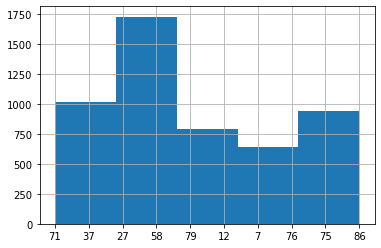

In [470]:
#df_opendata['EDAD'].describe()
df_opendata['EDAD'].hist(bins=5,range=(1,10));

In [443]:
lista_localidades = df_opendata['LOCALIDAD'].unique().tolist()
localidad = lista_localidades[0]
df_opendata[df_opendata['LOCALIDAD'] == localidad]

,NUMERO_INCIDENTE,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,UNIDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,MES,CLASIFICACION_FINAL
0,809224194,2019-01-08 00:28:00,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Norte,INCONSCIENTE/PARO CARDIORRESPIRATORIO,ALTA,AGOSTO,Cancelado
8,809326194,2019-01-08 00:34:00,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Norte,ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS,ALTA,AGOSTO,Falsa Alarma
22,809543194,2019-01-08 01:56:00,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Norte,ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS,ALTA,AGOSTO,Cancelado
42,809949194,2019-01-08 04:45:00,1,Usaquen,39,Años,MASCULINO,Norte,ACCIDENTE CEREBRO VASCULAR,ALTA,AGOSTO,Desistimiento
83,810518194,2019-01-08 07:42:00,1,Usaquen,SIN_DATO,SIN_DATO,SIN_DATO,Privada,ACCIDENTE DE TRÁNSITO CON HERIDOS/MUERTOS,ALTA,AGOSTO,Cancelado
...,...,...,...,...,...,...,...,...,...,...,...,...
65406,1173130196,2019-11-30 19:52:24,1,Usaquen,58,Años,MASCULINO,Norte,NaN,ALTA,NOVIEMBRE,SIN_DATO
65425,1173578196,2019-11-30 20:23:29,1,Usaquen,26,Años,FEMENINO,Norte,NaN,ALTA,NOVIEMBRE,SIN_DATO
65460,1174496196,2019-11-30 22:23:20,1,Usaquen,0,SIN_DATO,SIN_DATO,Norte,NaN,ALTA,NOVIEMBRE,SIN_DATO
65511,1176293196,2019-12-01 01:00:44,1,Usaquen,55,Años,MASCULINO,Sur,NaN,MEDIA,NOVIEMBRE,SIN_DATO


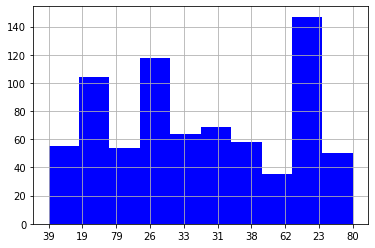

In [473]:
df_opendata[df_opendata['LOCALIDAD'] == lista_localidades[0]]['EDAD'].hist(bins=10,range=(1,10),color='red')
df_opendata[df_opendata['LOCALIDAD'] == lista_localidades[1]]['EDAD'].hist(bins=10,range=(1,10),color='blue');

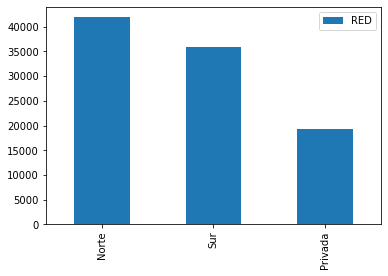

In [477]:
#Contar registros de fuente
df_opendata['NUMERO_INCIDENTE'].value_counts()
pd.DataFrame(
    df_opendata['RED'].value_counts(normalize=False)
).plot(kind='bar');

In [479]:
numincidentes = df_opendata.groupby(['RED']).count()
red = df_opendata['RED'].unique().tolist()
print(red)
print(numincidentes)
#plt.pie(numincidentes, labels=red, autopct="%0.1f %%")
#plt.axis("equal")
#plt.show()

df_opendata.groupby?



['Norte', 'Sur', 'Privada']
         NUMERO_INCIDENTE  FECHA_INICIO_DESPLAZAMIENTO_MOVIL  \
RED                                                            
Norte               41911                              41911   
Privada             19218                              19218   
Sur                 35856                              35856   

         CODIGO_LOCALIDAD  LOCALIDAD   EDAD  UNIDAD  GENERO  TIPO_INCIDENTE  \
RED                                                                           
Norte               41911      41911  41911   38745   41911           35074   
Privada             19218      19218  19218   17873   19218           16153   
Sur                 35856      35856  35856   33446   35856           29872   

         PRIORIDAD    MES  CLASIFICACION_FINAL  
RED                                             
Norte        41911  41911                41910  
Privada      19218  19218                19218  
Sur          35856  35856                35854  


Signature:
df_opendata.groupby(
    by=None,
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    squeeze: 'bool | lib.NoDefault' = <no_default>,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    

In [52]:
pd.DataFrame.plot?

Init signature: pd.DataFrame.plot(data)
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)
ax : matplotlib axes object, default None
    An axes of the current figure.
su